This script generate the demo of drag thrust profile to showcase the advantage of BEMT in simulating disturbances.

[PropellerLookupTable] Reading data from lookup_table\apc_8x6_with_trail.yaml


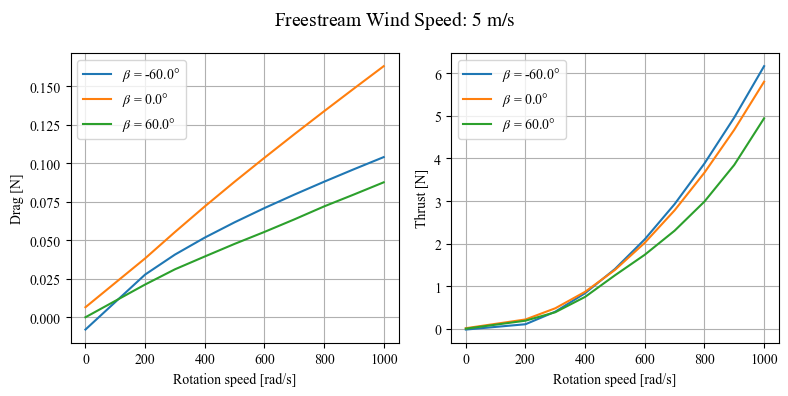

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from propeller_lookup_table import PropellerLookupTable
import os
import sys
# Get the current directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import common_utils.file_manager


apc_8x6 = PropellerLookupTable.Reader("apc_8x6_with_trail")

u_free_x_range = [5]
pitch_range = np.deg2rad([-90, -60, -30, 0, 30, 60, 90])
pitch_range = np.deg2rad([-60, 0, 60])    # for paper fig
omega_range = np.array([0, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

forces_grouped_by_pitch_then_omega = []
for u_free_x in u_free_x_range:
    for pitch in pitch_range:
        forces_by_omega = []
        for omega in omega_range:
            forces_by_omega.append(apc_8x6.query_data_from_table(u_free_x, pitch, omega))
        forces_grouped_by_pitch_then_omega.append(forces_by_omega)
forces_grouped_by_pitch_then_omega = np.array(forces_grouped_by_pitch_then_omega)


# Paper figure setting
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"
figsize = (8, 4)  # taller to fit both subplots nicely
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharex=True)

# --- Drag plot ---
for i, pitch in enumerate(pitch_range):
    ax1.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 0],
             label=fr"$\beta$ = {np.rad2deg(pitch):.1f}°")
ax1.set_xlabel("Rotation speed [rad/s]")
ax1.set_ylabel("Drag [N]")
ax1.legend()
ax1.grid()

# --- Thrust plot ---
for i, pitch in enumerate(pitch_range):
    ax2.plot(omega_range, forces_grouped_by_pitch_then_omega[i, :, 2],
             label=fr"$\beta$ = {np.rad2deg(pitch):.1f}°")
ax2.set_xlabel("Rotation speed [rad/s]")
ax2.set_ylabel("Thrust [N]")
ax2.legend()
ax2.grid()

fig.suptitle(r"Freestream Wind Speed: $5\ \mathrm{m/s}$", fontsize=14)
fig.tight_layout()
output_path = common_utils.file_manager.find_path_to_folder(["paper_results", "bemt_drag_thrust_combined.pdf"])
fig.savefig(output_path, bbox_inches="tight")
plt.show()

[PropellerLookupTable] Reading data from lookup_table\apc_8x6_with_trail.yaml
[PropellerLookupTable] Reading data from lookup_table\apc_8x6_fitted_in_noise_and_vibration.yaml
[PropellerLookupTable] Reading data from lookup_table\apc_8x6_fitted_in_noise_and_vibration_hover.yaml


c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\inflow_model\propeller_lookup_table.py:122: UserWarning: Warning: Interpolating outside the range:
u_free_x [m/s]: 10 (clipped: 0.0),
pitch [deg]: 0.0 (clipped: 0.0),
omega: 0 (clipped: 0)
  warnings.warn(f"Warning: Interpolating outside the range:\n"
c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\inflow_model\propeller_lookup_table.py:122: UserWarning: Warning: Interpolating outside the range:
u_free_x [m/s]: 10 (clipped: 0.0),
pitch [deg]: 0.0 (clipped: 0.0),
omega: 200 (clipped: 200)
  warnings.warn(f"Warning: Interpolating outside the range:\n"
c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly\Simulation\inflow_model\propeller_lookup_table.py:122: UserWarning: Warning: Interpolating outside the range:
u_free_x [m/s]: 10 (clipped: 0.0),
pitch [deg]: 0.0 (clipped: 0.0),
omega: 300 (clipped: 300)
  warnings.warn(f"Warning: Interpolating outside the range:\n"
c:\YimingVirtualDDrive\7_workSpace\repo\neural-fly

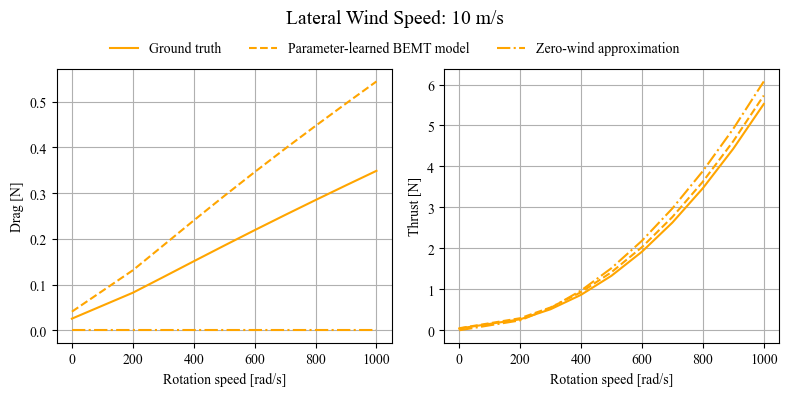

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from propeller_lookup_table import PropellerLookupTable

# === Load tables ===
apc_8x6 = PropellerLookupTable.Reader("apc_8x6_with_trail")
apc_8x6_sysid = PropellerLookupTable.Reader("apc_8x6_fitted_in_noise_and_vibration")
apc_8x6_hover = PropellerLookupTable.Reader("apc_8x6_fitted_in_noise_and_vibration_hover")

# === Configuration for paper figure ===
u_free_x_range = [10]
pitch_range = np.deg2rad([0])          # Only pitch = 0° for paper figure
omega_range = np.array([0, 200, 300, 400, 500, 600, 700, 800, 900, 1000])

forces_grouped_by_pitch_then_omega = []
forces_grouped_by_pitch_then_omega_sysid = []
forces_grouped_by_pitch_then_omega_hover = []

# === Query all three tables ===
for u_free_x in u_free_x_range:
    for pitch in pitch_range:
        forces_by_omega = []
        forces_by_omega_sysid = []
        forces_by_omega_hover = []
        for omega in omega_range:
            forces_by_omega.append(
                apc_8x6.query_data_from_table(u_free_x, pitch, omega)
            )
            forces_by_omega_sysid.append(
                apc_8x6_sysid.query_data_from_table(u_free_x, pitch, omega)
            )
            forces_by_omega_hover.append(
                apc_8x6_hover.query_data_from_table(u_free_x, pitch, omega)
            )
        forces_grouped_by_pitch_then_omega.append(forces_by_omega)
        forces_grouped_by_pitch_then_omega_sysid.append(forces_by_omega_sysid)
        forces_grouped_by_pitch_then_omega_hover.append(forces_by_omega_hover)

forces_grouped_by_pitch_then_omega = np.array(forces_grouped_by_pitch_then_omega)
forces_grouped_by_pitch_then_omega_sysid = np.array(forces_grouped_by_pitch_then_omega_sysid)
forces_grouped_by_pitch_then_omega_hover = np.array(forces_grouped_by_pitch_then_omega_hover)

# === Paper figure styling ===
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams["mathtext.fontset"] = "stix"

figsize = (8, 4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharex=True)


# === Drag plot ===
for i, pitch in enumerate(pitch_range):
    # Groundtruth (original table): solid
    ax1.plot(
        omega_range,
        forces_grouped_by_pitch_then_omega[i, :, 0],
        color='orange',
        linestyle='-',
    )
    # Identified in-wind model: dashed
    ax1.plot(
        omega_range,
        forces_grouped_by_pitch_then_omega_sysid[i, :, 0],
        color='orange',
        linestyle='--',
    )
    # Identified hover-only model: dotted
    ax1.plot(
        omega_range,
        forces_grouped_by_pitch_then_omega_hover[i, :, 0],
        color='orange',
        linestyle='-.',
    )

ax1.set_xlabel("Rotation speed [rad/s]")
ax1.set_ylabel("Drag [N]")
ax1.grid(True)

# === Thrust plot ===
for i, pitch in enumerate(pitch_range):
    # Groundtruth (original table): solid
    ax2.plot(
        omega_range,
        forces_grouped_by_pitch_then_omega[i, :, 2],
        color='orange',
        linestyle='-',
    )
    # Identified in-wind model: dashed
    ax2.plot(
        omega_range,
        forces_grouped_by_pitch_then_omega_sysid[i, :, 2],
        color='orange',
        linestyle='--',
    )
    # Identified hover-only model: dotted
    ax2.plot(
        omega_range,
        forces_grouped_by_pitch_then_omega_hover[i, :, 2],
        color='orange',
        linestyle='-.',
    )

ax2.set_xlabel("Rotation speed [rad/s]")
ax2.set_ylabel("Thrust [N]")
ax2.grid(True)

# === Title ===
fig.suptitle(
    r"Lateral Wind Speed: 10 m/s",
    fontsize=14,
    y=0.98   # push title upward slightly
)

# === Shared legend directly below title ===
fig.legend(
    ["Ground truth", "Parameter-learned BEMT model", "Zero-wind approximation"],
    loc="upper center",
    bbox_to_anchor=(0.5, 0.93),
    ncol=3,
    frameon=False,
)

# Adjust layout so plots fit under legend + title
fig.tight_layout(rect=[0, 0, 1, 0.95])

# === Save and show ===
output_path = common_utils.file_manager.find_path_to_folder(
    ["paper_results", "bemt_drag_thrust_combined_compare_sysid.png"]
)
fig.savefig(
    output_path,
    bbox_inches="tight",
    dpi=1000
)
plt.show()

